In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm

from scipy.integrate import odeint # Used to Integrate System of Differential Equations



In [66]:
# Definition of parameters
a = 1.0
b = 0.1
c = 1.5
d = 0.75

# initial population of rabbits and foxes
X0 = [10.0, 5.0]
# size of data
size = 100
# time lapse
time = 15
t = np.linspace(0, time, size)


class LotkaVolterra:
    
    
    def __init__(self):
        
        self.numLevels = 3
        
        # True Parameters 
        
        self.trueParameters = [1.0, 0.1, 1.5, 0.75, 10.0, 5.0]
        
        self.dataSize = 100
        
        self.time = [1., 5., 10.]
        
        self.ti = np.linspace(0.0, self.time[-1], self.dataSize)
        
        self.t = []
        
        self.ids = []
        
        for i in range(self.numLevels):
            self.ids.append(np.argwhere(self.ti <= self.time[i]))
            self.t.append(self.ti[self.ids[i]])
            
        self.rtol = [0.1, 0.01, 0.001]
        
        
        
    def dX_dt(self,X, t, a, b, c, d):
        
        """ 
        Lotka Volterra Equations
        Given Parameters Returns the growth rate of fox and rabbit populations. 
        """

        return np.array([a * X[0] - b * X[0] * X[1], -c * X[1] + d * b * X[0] * X[1]])
    
    def evaluate(self, param, level = -1, noise = False):
        # simulator function
        X0 = [param[4], param[5]]
        print(self.t[level].shape)
        X = odeint(self.dX_dt, y0=X0, t=self.t[level].flatten(), rtol=self.rtol[level], args=(param[0], param[1], param[2], param[3]))
        if(noise):
            np.random.seed(123)
            X += np.random.normal(size=(self.t[level].shape[0], 2))
        return X
    
            


In [67]:
myModel = LotkaVolterra()

In [68]:
l = 1
maxLevel = 3

In [69]:
observed = myModel.evaluate(myModel.trueParameters, noise = True)

data = []

for i in range(maxLevel):
    data.append(observed[myModel.ids[i]][:])



(100, 1)


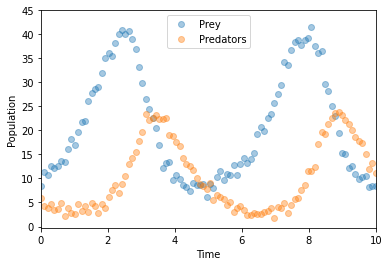

In [83]:
# plotting observed data.
_, ax = plt.subplots(figsize=(6, 4))
ax.plot(myModel.t[-1],observed[:, 0], "o", alpha = 0.4, label="Prey")
ax.plot(myModel.t[-1],observed[:, 1], "o", alpha = 0.4, label="Predators")
ax.set_xlabel("Time")
ax.set_ylabel("Population")
ax.set_xticks([0., 2., 4., 6., 8., 10.])
ax.set_yticks([0., 5., 10., 15., 20., 25., 30., 35., 40., 45.])
ax.set_xlim([0., 10.])
ax.legend();

plt.savefig("PredatorPrey_data.pdf")